In [1]:
from pyspark.sql import SparkSession
from pathlib import Path
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
from PIL import Image
import io
import requests

# 1. Khởi tạo Spark
spark = SparkSession.builder \
    .appName("Xray HDFS Example") \
    .getOrCreate()

In [3]:
df_path = "hdfs://namenode:8020/xray/metadata/metadata_test_lines.json"
df = spark.read.json(df_path)
df.show(5, truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------+--------------------------------------+-----------------------+--------------------------------+----------------------------------------------------+-------------------+
|caption                                                                                                                                                                                                                                                                       |concepts                               |hdfs_path                             |image_id               |license                         |link                                                |timestamp          |
+-----------------------------------

In [4]:
df.printSchema()

root
 |-- caption: string (nullable = true)
 |-- concepts: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- CUI: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- hdfs_path: string (nullable = true)
 |-- image_id: string (nullable = true)
 |-- license: string (nullable = true)
 |-- link: string (nullable = true)
 |-- timestamp: string (nullable = true)



In [5]:
print("Số lượng ảnh metadata:", df.count())
print("Các cột có trong metadata:", df.columns)

Số lượng ảnh metadata: 9927
Các cột có trong metadata: ['caption', 'concepts', 'hdfs_path', 'image_id', 'license', 'link', 'timestamp']


In [6]:
!pip install hdfs

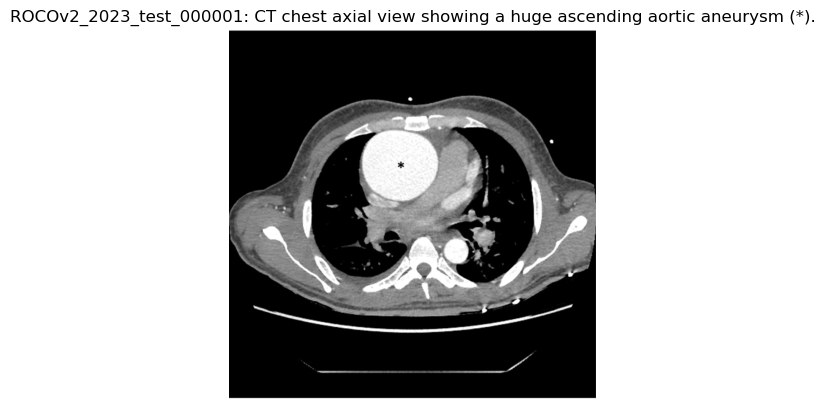

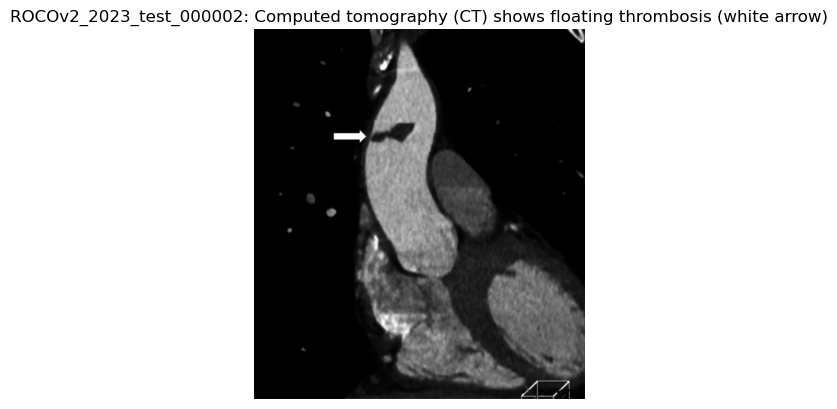

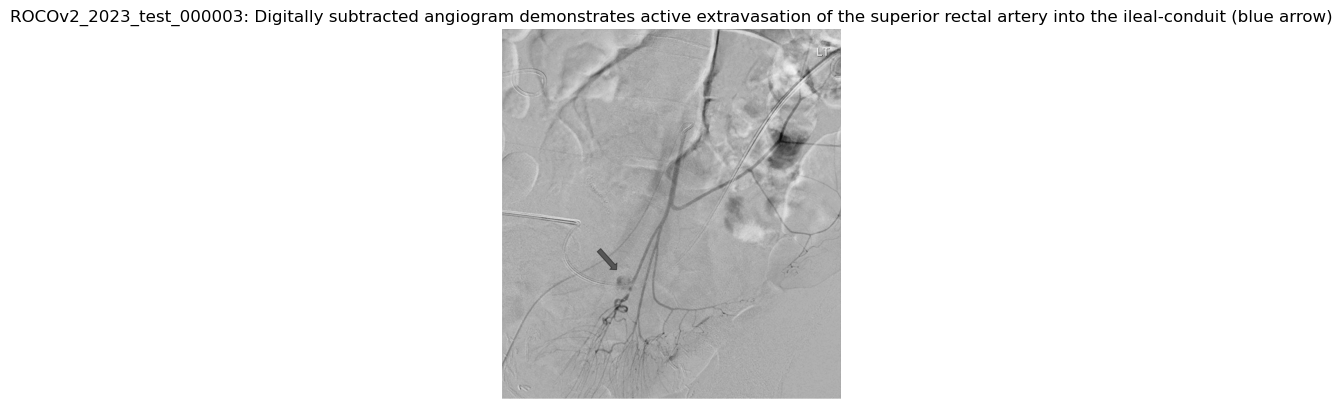

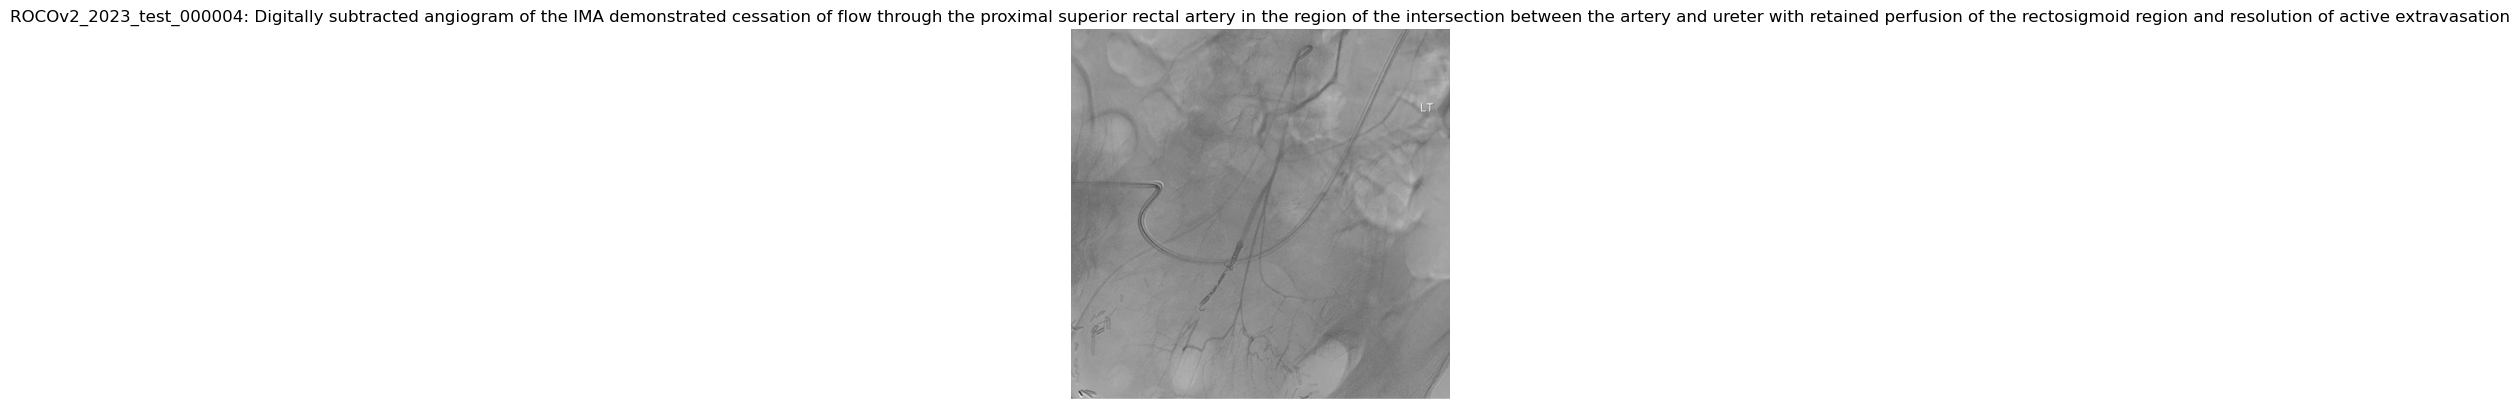

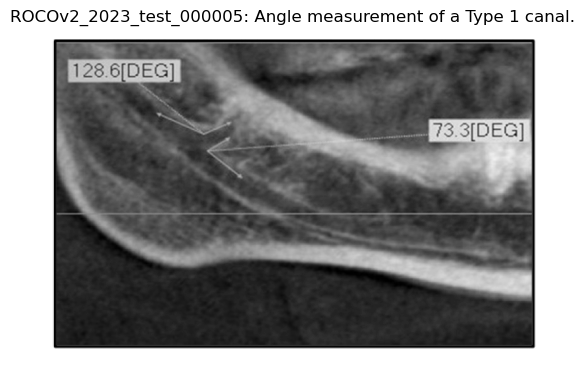

In [7]:
from hdfs import InsecureClient
from PIL import Image
import matplotlib.pyplot as plt
import random

client = InsecureClient('http://namenode:9870', user='hadoop')

sample_df = df.limit(5).collect()

for item in sample_df:
    hdfs_path = item['hdfs_path']
    caption = item['caption']
    image_id = item['image_id']

    with client.read(hdfs_path) as reader:
        img = Image.open(reader).convert('L')

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"{image_id}: {caption}")
    plt.show()
